## Secure key rate of DPS against specific individual attacks


In [74]:
# Required inputs
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams["figure.figsize"] = (20,10)

Assuming that the eavesdropper is restricted to only individual attacks, the secure key rate can be calculated for the DPS-QKD protocol as, 

\begin{equation}
R_{\text{sk}}= R_{\rm{sifted}}\left\{\tau-f(e)\left[h(e)\right]\right\}\label{keyrateExp}.
\end{equation}

Here, $R_{\text{sifted}} = s\gamma p_{\text {click }}$, where $s$ is the sifting parameter, with $s=2/3 $ for $3$-pulse case. $\gamma$ is the repetition rate of the transmission, $p_{\text {click }}$ is the probability of Bob's detection taking into account detector efficiencies $\eta$, $e$ is the bit error rate, and $f(e)$ characterizes the performance of the error correction algorithm. The parameter $\tau$ represents the shrinking factor due to privacy amplification and is calculated from the average collision probability and $h(e)=-(e \log _{2} e+(1-e) \log _{2}(1-e))$ is the Shannon binary entropy.

The bit error rate $e$ has contributions from both the signal and dark counts. The error in the signal states can be due to imperfect state preparation. The dark counts are uncorrelated to Alice's key and thus have a 50 percent chance of being wrong. The bit error rate is thus given as \begin{equation}e=\dfrac{0.5 p_{\text{dark}}+ b p_{\text{signal}}}{p_{\text{click}}}\end{equation} \noindent Here $b$ is the baseline system error rate quantifying the imperfect state preparation.

### The parameters used in calculating the key rate is as follows:


| Parameter | Value        |
|-----------|--------------|
| $\mu$             | 0.2          |
| $\gamma$          | $10^7$      |
| b                 | 0.01         |
| $\eta$            | 0.1          |
| $p_{\text{dark}}$ | $ 3.9$  $10^{-5}$ |
| f(e)              | 1.16         |



### The key rate expression plotted are as follows:

The lower bound considering the most general individual attack is given as:

\begin{equation}
    R_{\rm ind} = -p_{\rm click}[-(1-2\mu) \log_{2} p_{\rm co} + f(e)h(e)]
\end{equation}

where $p_{\text{co}}= 1-e^2-{(1-6e)^{2}}/2.$

In the presence of general intercept and resend the shrinking factor is $\tau = 1-3e $

In the presence of MED attack, the key rate is given as-
\begin{equation}
    R_{\rm MED} = -s \gamma p_{\rm click}[-((2/3)4e)\log_{2} 0.72 + (1-(2/3)4e)+f(e)h(e)]
\end{equation}

In the presence of Cloning attack, the secure key rate is given as-
\begin{equation}
    R_{\rm Cloning} = -s \gamma p_{\rm click}[-((2/3)7.69e)\log_{2} 0.61 + (1-(2/3)7.69e)+f(e)h(e)]
\end{equation}


In [88]:
# defining a function to calculate Shannon's binary entropy 
def hfunc(e):
    h=-e*np.log2(e)-((1-e)*np.log2(1-e))
    return h


# skrlow calculates the lower bound of the secure key rate 
def skrlow(l):
    mu,gamma,s,b,ls,eta,fe,d=0.2,10**7,(2/3),0.01,1,0.1,1.16,1.95*(10**(-5))
    def t(l): #line transmisivity at a distance l
        ls=1
        eta=0.1
        t=eta*10**((-1*((0.2*l)+ls))/10)
        return t
    psignal=mu*t(l)
    pdark=2*d
    pclick=psignal+ pdark
    e=((0.5*pdark+b*psignal)/psignal)
    k=1 - e**2 - (1 - (6*(e**2)))/2
    tau=-(1-2*mu)*np.log2(k)
    Rdps=s*gamma*pclick*(tau-fe*(hfunc(e)))
    return Rdps

# skrir caclculates the secure key rate in the presence of general intercept and resend attack
def skrir(l):
    mu,gamma,s,b,ls,eta,fe,d=0.2,10**7,(2/3),0.01,1,0.1,1.16,1.95*(10**(-5))
    def t(l):
        ls=1
        eta=0.1
        t=eta*10**((-1*((0.2*l)+ls))/10)
        return t
    psignal=mu*t(l)
    pdark=2*d
    pclick=psignal+ pdark
    e=((0.5*pdark+b*psignal)/psignal)
    tau=1-e
    Rdps=s*gamma*pclick*(tau-fe*((e*np.log2(e))+((1-e)*np.log2(1-e))))
    return Rdps

# skrmed caclculates the secure key rate in the presence of intercept and resend attack with minimum error discrimination
def skrmed(l):
    mu,gamma,s,b,ls,eta,fe,d=0.2,10**7,(2/3),0.01,1,0.1,1.16,1.95*(10**(-5))
    def t(l):
        ls=1
        eta=0.1
        t=eta*10**((-1*((0.2*l)+ls))/10)
        return t
    psignal=mu*t(l)
    pdark=2*d
    pclick=psignal+ pdark
    e=((0.5*pdark+b*psignal)/psignal)
    tau=-(2/3)*4*e*np.log2(0.72)+(1-(2/3)*(4*e))
    Rdps=s*gamma*pclick*(tau-fe*((e*np.log2(e))+((1-e)*np.log2(1-e))))
    return Rdps

# skrclo caclculates the secure key rate in the presence of the cloning attack
def skrclo(l):
    mu,gamma,s,b,ls,eta,fe,d=0.2,10**7,(2/3),0.01,1,0.1,1.16,1.95*(10**(-5))
    def t(l):
        ls=1
        eta=0.1
        t=eta*10**((-1*((0.2*l)+ls))/10)
        return t
    psignal=mu*t(l)
    pdark=2*d
    pclick=psignal+ pdark
    e=((0.5*pdark+b*psignal)/psignal)
    tau=-(2/3)*7.69*e*np.log2(0.61)+(1-(2/3)*(7.69*e))
    Rdps=s*gamma*pclick*(tau-fe*((e*np.log2(e))+((1-e)*np.log2(1-e))))
    return Rdps


In [95]:
# plotting the secure key rate at distances 
x=np.arange(0,300,0.5)
skr_low=[]
skr_ir=[]
skr_med=[]
skr_clo=[]
for i in x:
    skr_low.append(skrlow(x))
    skr_ir.append(skrir(x))
    skr_med.append(skrmed(x))
    skr_clo.append(skrclo(x))

C:\Users\valli\AppData\Local\Temp\ipykernel_12744\3974029349.py:3: RuntimeWarning: invalid value encountered in log2
  h=-e*np.log2(e)-((1-e)*np.log2(1-e))
C:\Users\valli\AppData\Local\Temp\ipykernel_12744\3974029349.py:37: RuntimeWarning: invalid value encountered in log2
  Rdps=s*gamma*pclick*(tau-fe*((e*np.log2(e))+((1-e)*np.log2(1-e))))
C:\Users\valli\AppData\Local\Temp\ipykernel_12744\3974029349.py:53: RuntimeWarning: invalid value encountered in log2
  Rdps=s*gamma*pclick*(tau-fe*((e*np.log2(e))+((1-e)*np.log2(1-e))))
C:\Users\valli\AppData\Local\Temp\ipykernel_12744\3974029349.py:69: RuntimeWarning: invalid value encountered in log2
  Rdps=s*gamma*pclick*(tau-fe*((e*np.log2(e))+((1-e)*np.log2(1-e))))


C:\Users\valli\AppData\Local\Temp\ipykernel_12744\3687762896.py:3: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,10**5])
C:\Users\valli\AppData\Local\Temp\ipykernel_12744\3687762896.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,10**5])
C:\Users\valli\AppData\Local\Temp\ipykernel_12744\3687762896.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,10**5])


Text(0, 0.5, 'Secure key rate in bits/second')

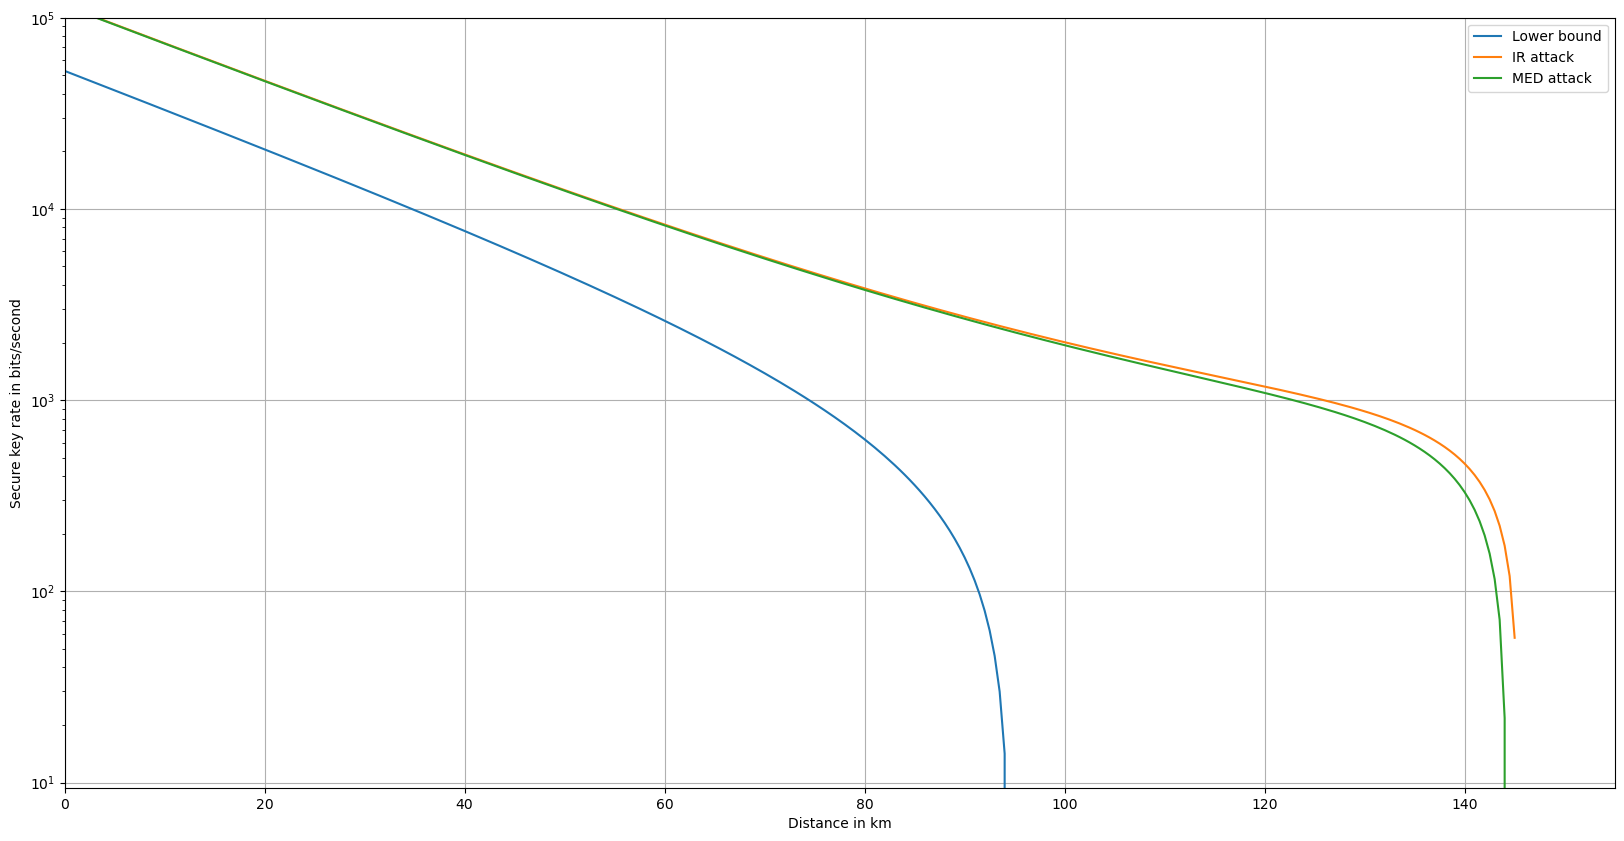

In [96]:
# Ploting the secure key rate vs distances:
plt.semilogy(x,skr_low[0])
plt.ylim([0,10**5])
plt.xlim([0,155])


plt.semilogy(x,skr_ir[0])
plt.ylim([0,10**5])
plt.xlim([0,155])

plt.semilogy(x,skr_med[0])
plt.ylim([0,10**5])
plt.xlim([0,155])



plt.legend(["Lower bound","IR attack","MED attack"])
plt.grid()
plt.xlabel("Distance in km")
plt.ylabel("Secure key rate in bits/second")
#plt.savefig('IR_MED_Clo.png')

C:\Users\valli\AppData\Local\Temp\ipykernel_12744\1009966435.py:3: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,10**5])
C:\Users\valli\AppData\Local\Temp\ipykernel_12744\1009966435.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,10**5])
C:\Users\valli\AppData\Local\Temp\ipykernel_12744\1009966435.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,10**5])
C:\Users\valli\AppData\Local\Temp\ipykernel_12744\1009966435.py:16: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,10**5])


Text(0, 0.5, 'Secure key rate in bits/second')

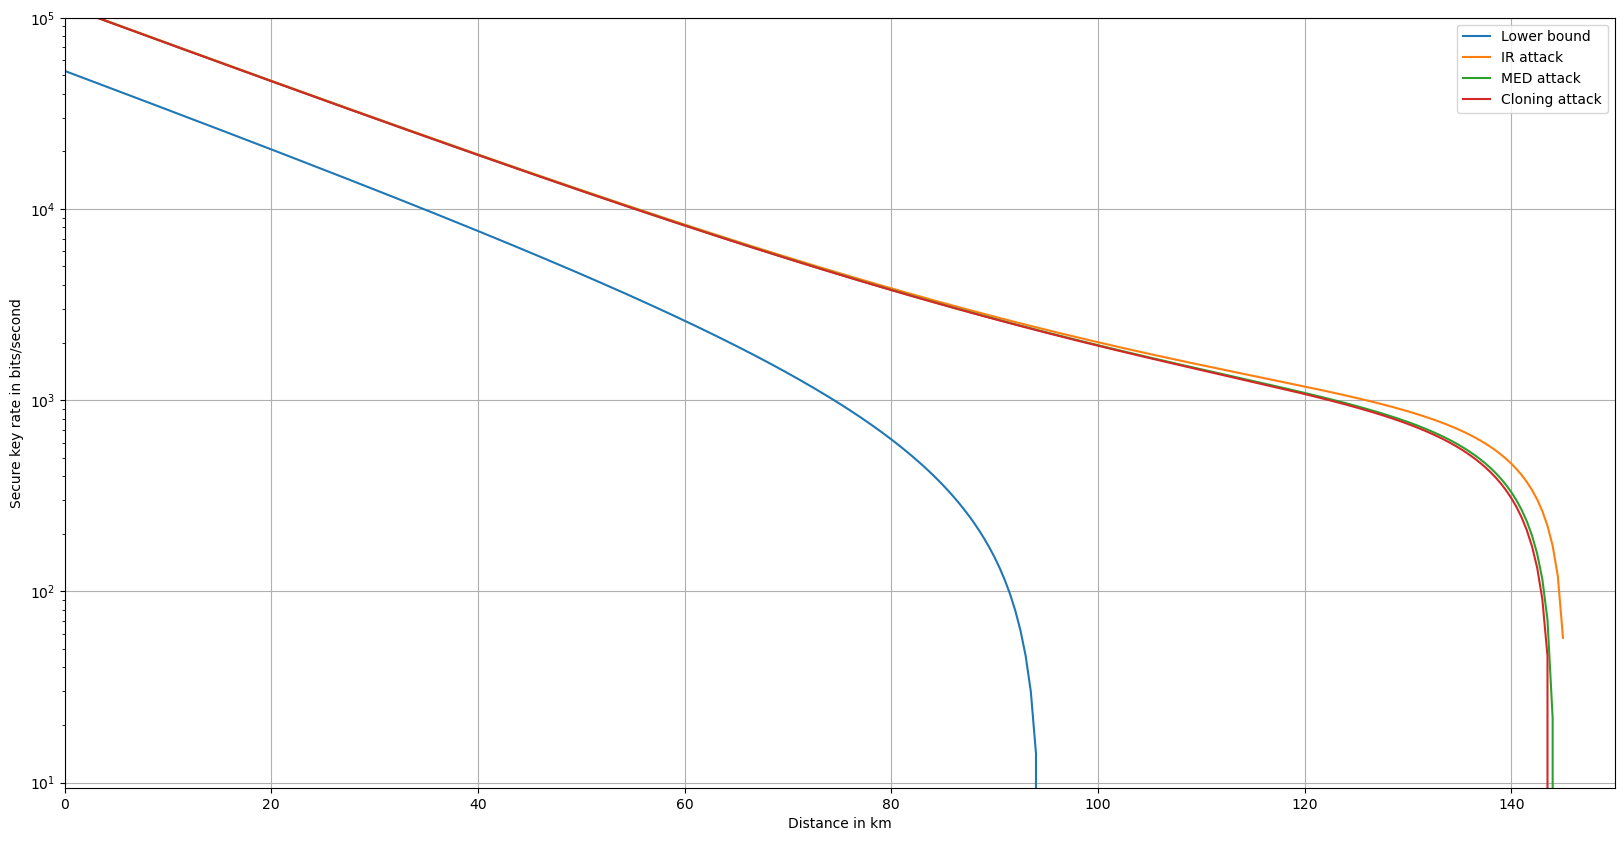

In [109]:
# Ploting the secure key rate vs distances:
plt.semilogy(x,skr_low[0])
plt.ylim([0,10**5])
plt.xlim([0,155])


plt.semilogy(x,skr_ir[0])
plt.ylim([0,10**5])
plt.xlim([0,150])

plt.semilogy(x,skr_med[0])
plt.ylim([0,10**5])
plt.xlim([100,150])

plt.semilogy(x,skr_clo[0])
plt.ylim([0,10**5])
plt.xlim([0,150])


plt.legend(["Lower bound","IR attack","MED attack","Cloning attack"])
plt.grid()
plt.xlabel("Distance in km")
plt.ylabel("Secure key rate in bits/second")